In [1]:
import os
print(os.getcwd())

from src.example_module import example_function

# Call the function
example_function()

c:\Users\ASUS TUF\Documents\GitHub\deployment-poetry\notebooks
Example function executed successfully!


In [2]:
from src.load_data import load_data

file_path = '../data/flight_df.csv'

# Load the dataset
df = load_data(file_path)

selected_columns = [
'Inflight wifi service',
'Age',
'Flight Distance',
'Class',
'Online boarding',
'Checkin service',
'Loyal Customer',
'Seat comfort',
'Leg room service',
'Business Travel',
'satisfied']

# Filter dataframe to use only selected columns
df = df[selected_columns]
df.head()

,Inflight wifi service,Age,Flight Distance,Class,Online boarding,Checkin service,Loyal Customer,Seat comfort,Leg room service,Business Travel,satisfied
0,2,26,2062,3,2,3,1,2,3,1,0
1,5,52,680,3,4,4,1,4,4,1,1
2,3,28,188,1,3,4,1,3,3,0,0
3,3,54,453,3,4,4,1,4,3,1,0
4,4,40,775,1,4,3,1,4,1,1,0


In [3]:
from sklearn.model_selection import train_test_split

# Define the traget and features
y = df['satisfied']
X = df.drop(columns='satisfied')

In [4]:
import os

data_path = '../data/app_flight_df.csv'

try:
    # Save the features dataframe for app
    X.to_csv(data_path, index=False)

    # Confirm if successful
    if os.path.exists(data_path):
        print(f'Dataframe saved successfully to: {data_path}')
    else:
        print(f'Failed to save dataframe: {data_path}')

except Exception as error:
    print(f'Error in saving dataframe to {data_path}: {error}')

Dataframe saved successfully to: ../data/app_flight_df.csv


In [5]:
# Split the data into train and test 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for class imbalance
y.value_counts(normalize=True)

satisfied
0    0.56695
1    0.43305
Name: proportion, dtype: float64

In [6]:
from src.preprocessing import create_preprocessing_pipeline

# Create preprocessor object
preprocessor = create_preprocessing_pipeline()

In [7]:
import pandas as pd
from src.preprocessing import preprocess_and_rebalance_data

# Preprocess and rebalance the data
X_train_balanced, X_test_transformed, y_train_balanced = preprocess_and_rebalance_data(preprocessor, X_train, X_test, y_train)

# Convert preprocessed data back to a dataframe
X_train_balanced_df = pd.DataFrame(X_train_balanced)
X_test_transformed_df = pd.DataFrame(X_test_transformed)


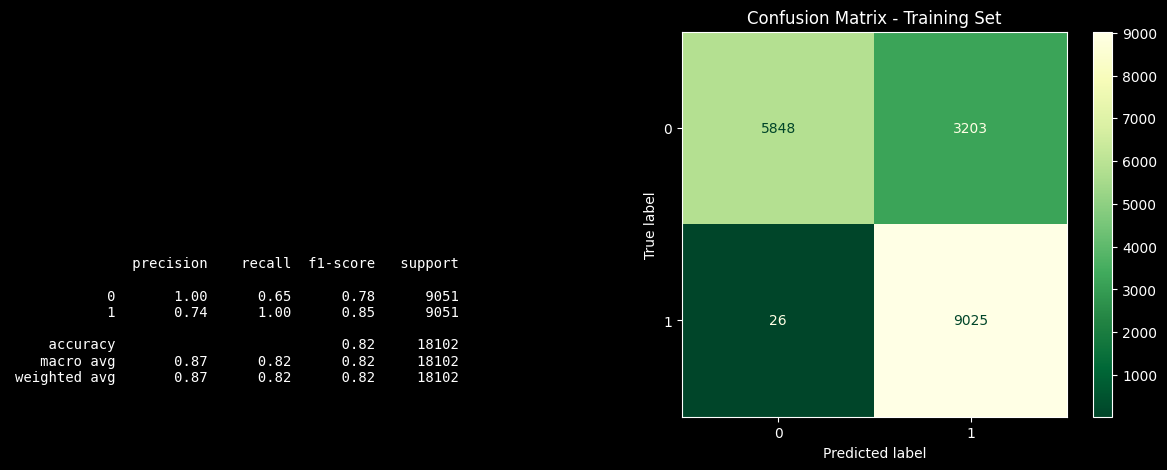

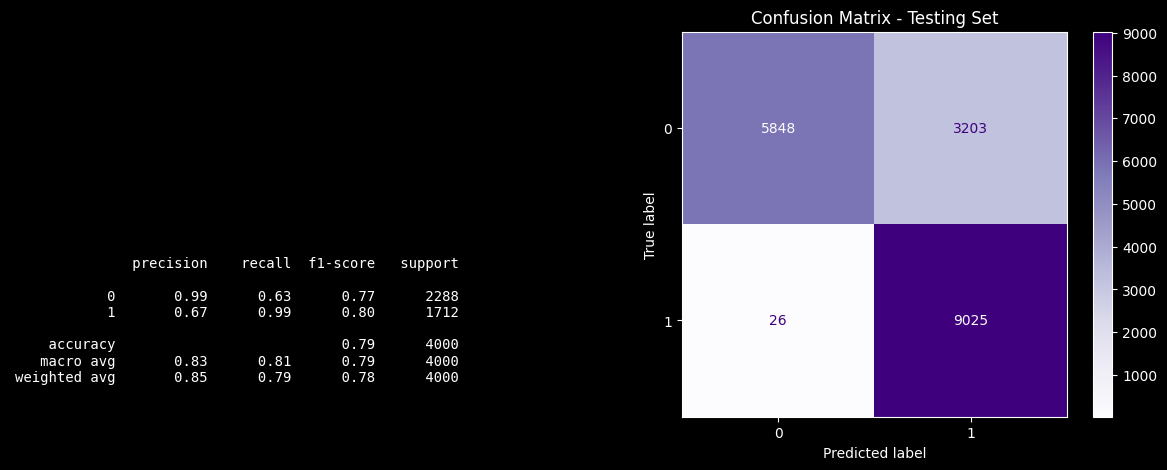

In [8]:
from src.train_evaluate import evaluate_model, train_predict_model, save_model

import lightgbm as lgb

# Instantiate the model
lgb_model = lgb.LGBMClassifier(verbose=-1, random_state=42)

# Create and save predictions
train_preds, test_preds = train_predict_model(X_train_balanced_df, y_train_balanced, X_test_transformed_df, preprocessor, lgb_model)

# Return train and test reports
train_report, test_reports = evaluate_model(lgb_model, X_train_balanced_df, y_train_balanced, X_test_transformed_df, y_test)

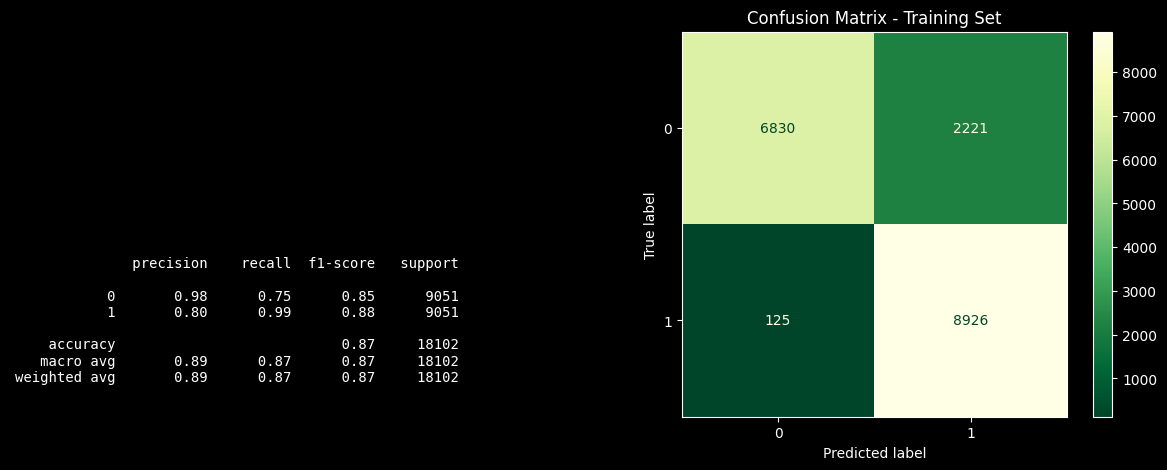

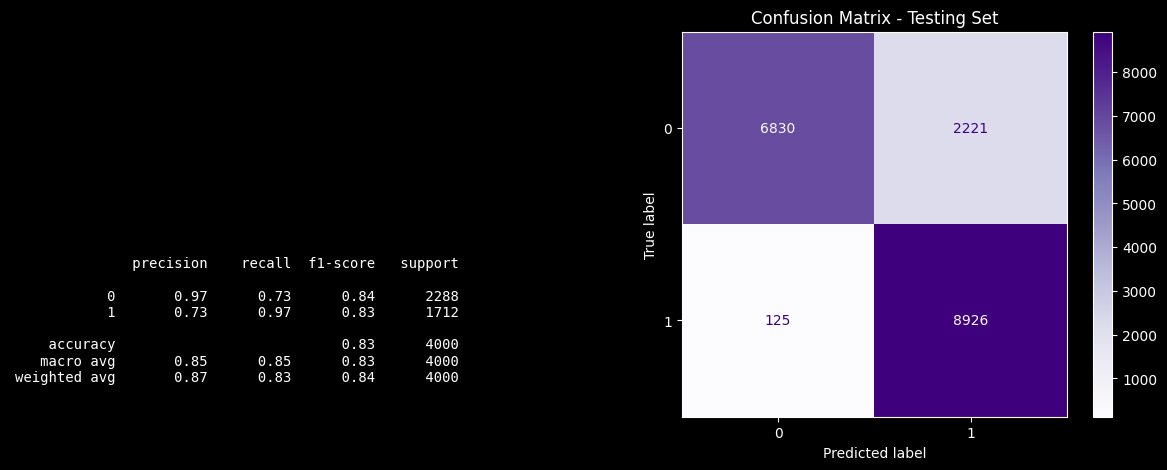

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dec_model = DecisionTreeClassifier()

# Create and save predictions
train_preds, test_preds = train_predict_model(X_train_balanced_df, y_train_balanced, X_test_transformed_df, preprocessor, dec_model)

# Return train and test reports
train_report, test_reports = evaluate_model(dec_model, X_train_balanced_df, y_train_balanced, X_test_transformed_df, y_test)

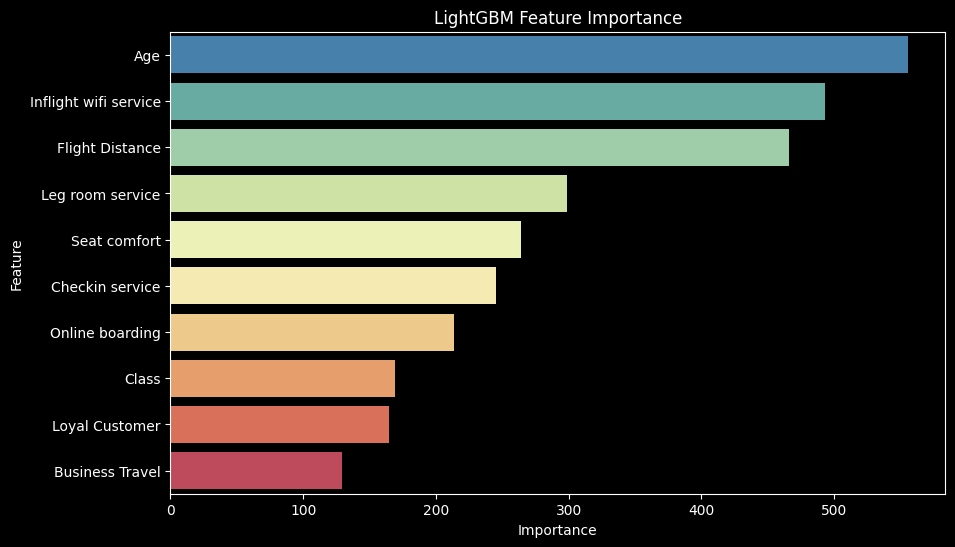

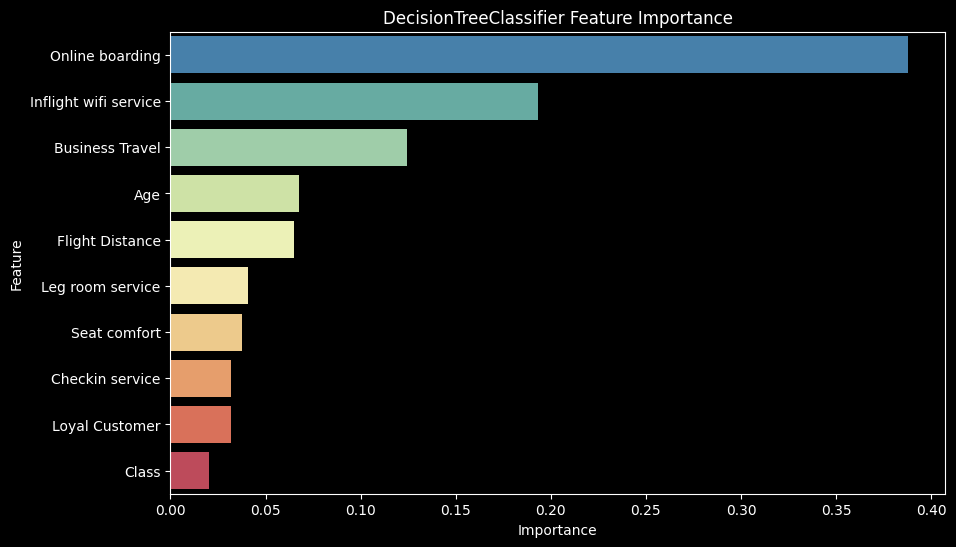

In [10]:
from src.feature_importance import train_model, get_feature_importance, plot_feature_importance

# Get feature names
feature_names = X_train.columns

# Train LGBMClassifier
trained_lgb_model = train_model(lgb_model, X_train_balanced, y_train_balanced)

# Get and plot feature importance of LGBClassifier
lgbm_feature_importance = get_feature_importance(trained_lgb_model, feature_names)
plot_feature_importance(lgbm_feature_importance, title='LightGBM Feature Importance')

# Train DecisionTreeClassifier
trained_dec_model = train_model(dec_model, X_train_balanced, y_train_balanced)

# Get and plot feature importance of DecisionTreeClassifier
dec_feature_importance = get_feature_importance(trained_dec_model, feature_names)
plot_feature_importance(dec_feature_importance, title='DecisionTreeClassifier Feature Importance')

In [11]:
# Save the LGBMClassifier
model_path = '../models/lgb.model.joblib'
save_model(lgb_model, model_path)

# Save the DecisionTreeClassifier
model_path = '../models/dec.model.joblib'
save_model(lgb_model, model_path)

Model saved successfully to: ../models/lgb.model.joblib
Model saved successfully to: ../models/dec.model.joblib
